# Download Antarctic datasets
The module `antarctic_plots.fetch` provides an easy way to download and store common datasets related to Antarctica. More datasets will be added, so check the changelogs new datasets or submit a issue on github to request adding new datasets.

All the functions in the `antarctic_plots.fetch` module use the python package Pooch to download and store the data. The first call to a function with download the data, which may take some time, but subsequent calls to the same function will just fetch the previously downloaded data. These datasets will be stored by default in your following local file:
* Mac: `~/Library/Caches/pooch`
* Unix: `~/.cache/pooch` or the value of the XDG_CACHE_HOME environment variable, if defined.
* Windows: `C:\Users\<user>\AppData\Local\pooch\pooch\Cache`

In [2]:
from antarctic_plots import fetch, regions, maps, utils

c:\Users\matthewt\AppData\Local\miniforge3\envs\antarctic_plots\lib\site-packages\xarray\backends\cfgrib_.py:29: UserWarning: Failed to load cfgrib - most likely there is a problem accessing the ecCodes library. Try `import cfgrib` to get the full error message
  warnings.warn(


Download and plot BedMap thickness data, the default will return a grid of the full antarctic region, at a coarse 10km resolution.


c:\Users\matthewt\AppData\Local\miniforge3\envs\antarctic_plots\lib\site-packages\xarray\backends\plugins.py:64: RuntimeWarning: Engine 'cfgrib' loading failed:
Cannot find the ecCodes library
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)


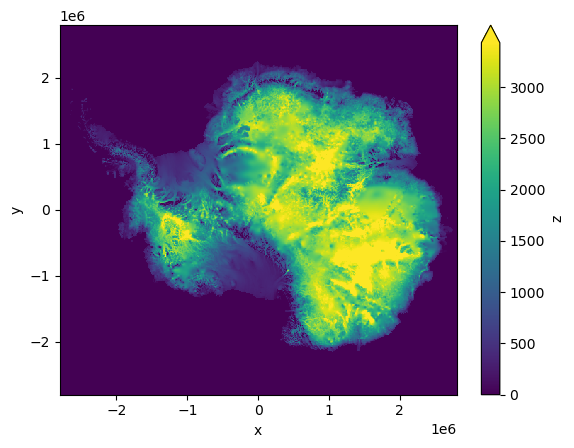

In [3]:
grid = fetch.bedmap2(
    layer="thickness",
    plot=True,
)

To print out info of the grid, use `info=True`

In [4]:
grid = fetch.bedmap2(
    layer="surface",
    info=True,
)

: Title: 
: Command: 
: Remark: 
: Gridline node registration used [Cartesian grid]
: Grid file format: nf = GMT netCDF format (32-bit float), CF-1.7
: x_min: -2795000 x_max: 2795000 x_inc: 10000 name: x n_columns: 560
: y_min: -2795000 y_max: 2795000 y_inc: 10000 name: y n_rows: 560
: v_min: 0 v_max: 4079.91796875 name: z
: scale_factor: 1 add_offset: 0
: format: classic
: Default CPT: 



Specify the region and grid spacing

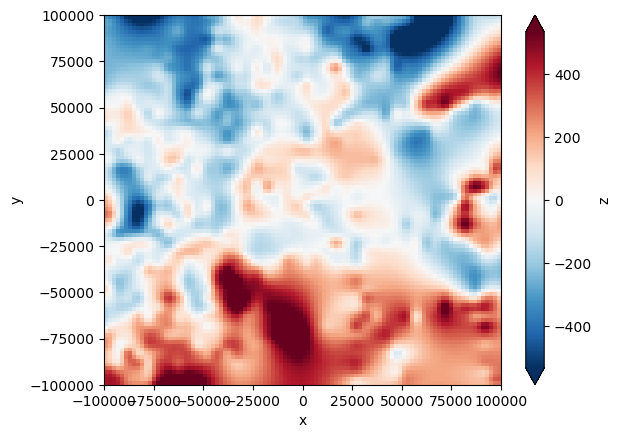

In [5]:
grid = fetch.bedmap2(
    layer="bed",
    region=(-100e3, 100e3, -100e3, 100e3),
    spacing=1e3,
    plot=True,
)

Apply common corrections, such as calculating the ice base (surface - thickness) and converting the grid elevation from a geoid to an ellipsoid reference

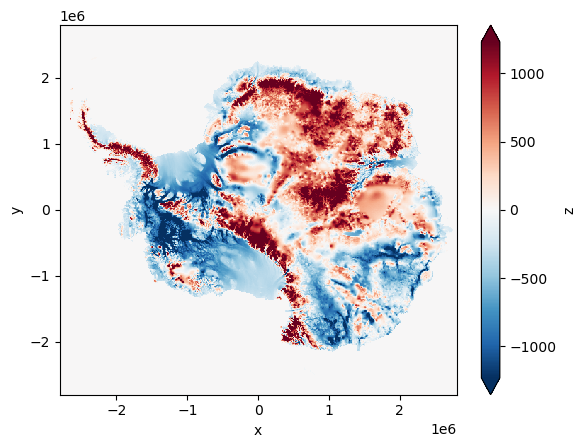

In [6]:
grid = fetch.bedmap2(
    layer="icebase",
    reference="ellipsoid",
    plot=True,
)

`Fetch` also allows for downloading datasets from [NSIDC](https://nsidc.org/home), which requires an [Earthdata login](https://urs.earthdata.nasa.gov/home). Calling `fetch` on one of these datasets will either 
1) look for a username and password which have been set in your environment variables as `EARTHDATA_USERNAME` and `EARTHDATA_PASSWORD` or
2) prompts to enter your username and password will appear. 

Note: you may need to restart your computer for new environement variable to be registered.

c:\Users\matthewt\AppData\Local\miniforge3\envs\antarctic_plots\lib\site-packages\xarray\backends\plugins.py:64: RuntimeWarning: Engine 'cfgrib' loading failed:
Cannot find the ecCodes library
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)


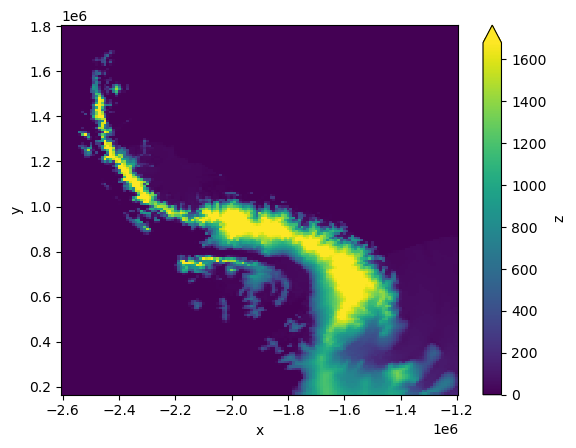

In [3]:
grid = fetch.bedmachine(
    layer="surface",
    plot=True,
    region=regions.antarctic_peninsula,
)

c:\Users\matthewt\AppData\Local\miniforge3\envs\antarctic_plots\lib\site-packages\xarray\backends\plugins.py:64: RuntimeWarning: Engine 'cfgrib' loading failed:
Cannot find the ecCodes library
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)


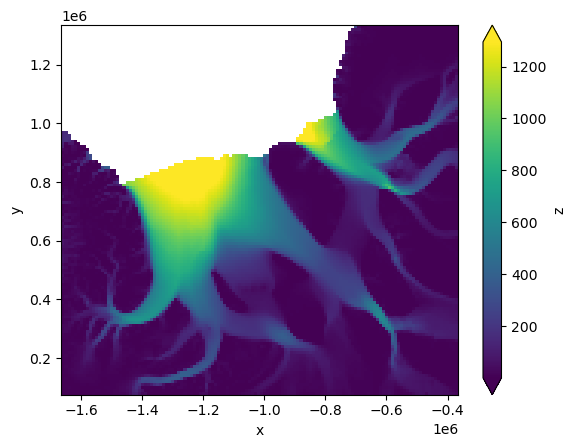

In [2]:
grid = fetch.ice_vel(
    region=regions.ronne_filchner_ice_shelf,
    plot=True,
)

psconvert [ERROR]: Registry registered C:\Program Files (x86)\GPLGS\gswin32c.exe does not exist. Resorting to the one provided in GMT.


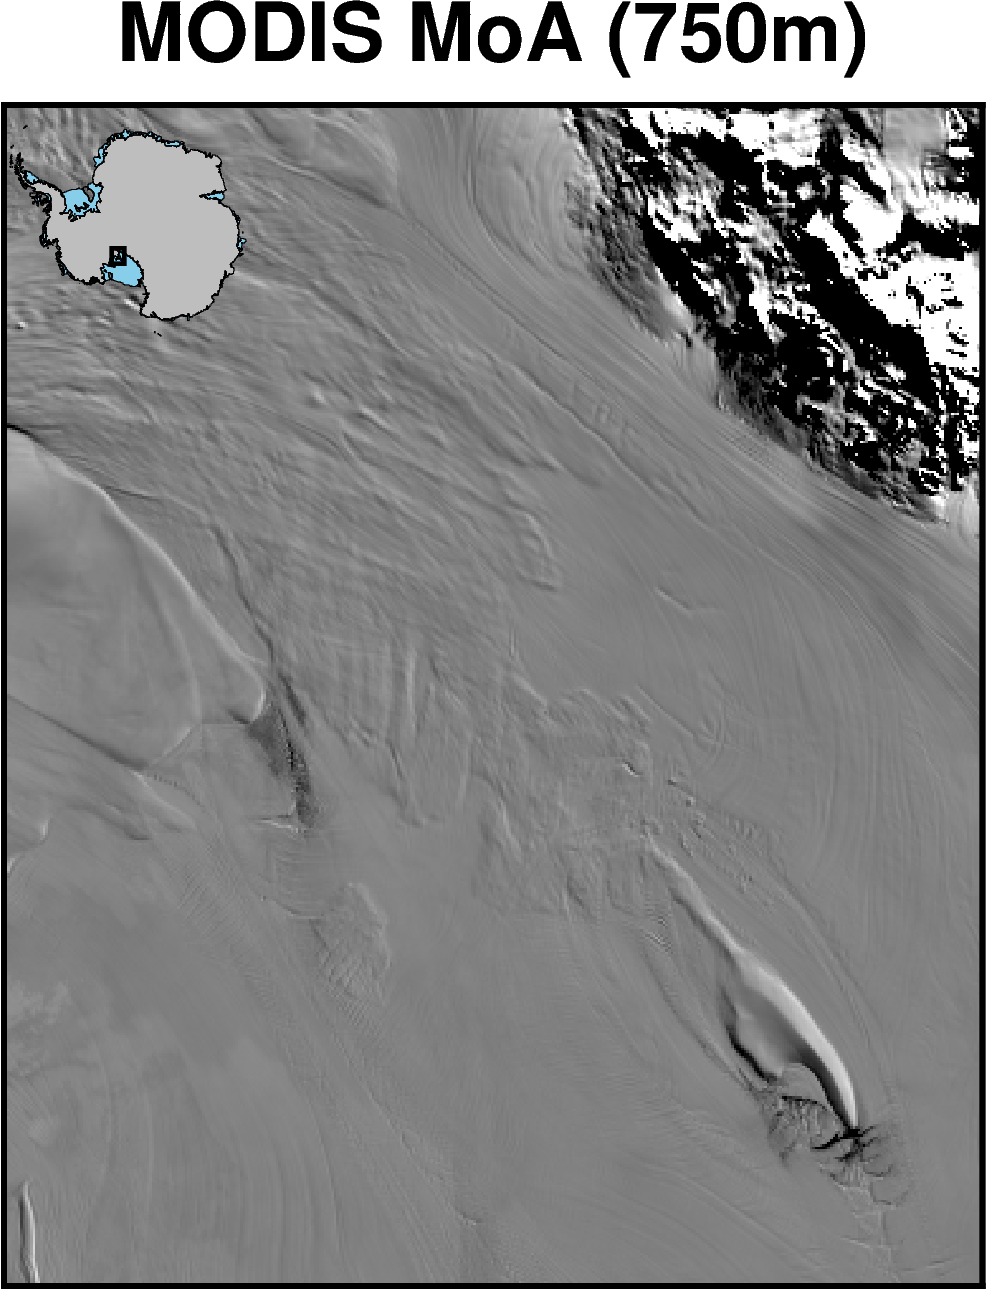

In [6]:
moa = fetch.modis_moa(version=750)

fig = maps.plot_grd(
    moa,
    cmap='gray',
    image=True,
    plot_region=regions.crary_ice_rise,
    title="MODIS MoA (750m)",
    inset=True,
    )

fig.show()